
# 7.3: Higher Dimensions

In [135]:

%load_ext autoreload
%autoreload 2
from jupyterthemes import jtplot
jtplot.style()

from ch07.vectors import *
from ch07.functions import *
from ch05.vector_drawing import *
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 7.3.1

Testing if we can find a perpendicular line using the formula given

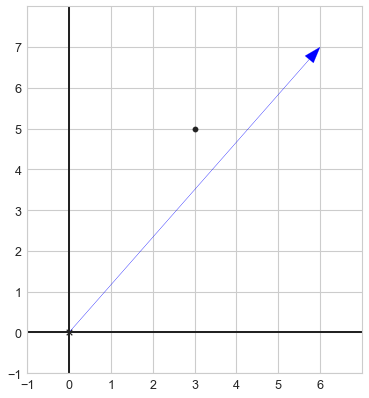

In [13]:
# Draw a point, and a vector, then try to find a line perpendicular to the vector which also crosses thru
# the point...

# Lets use the same values given in the book but mess around a bit to see if they hold:

x0, y0 = 3, 5
vx, vy = 6, 7

p = (x0, y0)
vec = (vx, vy)

draw(Points(p),
     Arrow(vec, color='blue'))

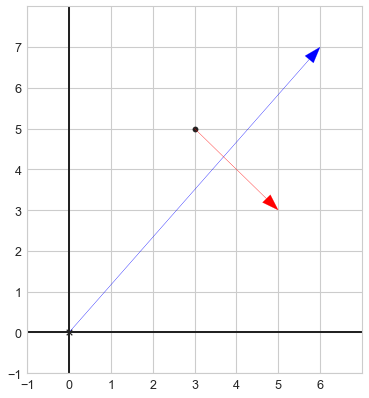

In [16]:
perp_start = p
perp_end = (5, 3)
draw(Points(p),
     Arrow(vec, color='blue'),
     Arrow(perp_end, perp_start, color='red'))


In [131]:

def find_intersection():
    delta = subtract(perp_end, p)
    #delta = (2, -2)
    f = lambda t: add( p, scale(t, delta) )

    #return f(0.32)

    for t in np.arange(-100.0, 100.0, 0.01):
        x, y = f(t)
        if (np.isclose(dot( vec, (x, y) ), 0.0, 0.1, 0.1)):
            return (x, y)
    print("no intersection found")

finding intersection..
(55.90000000012938, -47.90000000012938)
0.09999999987059027


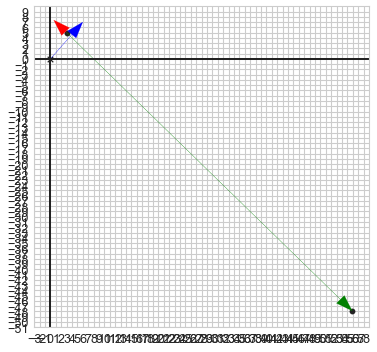

In [133]:
print("finding intersection..")
intersection_p = find_intersection()
print(intersection_p)
print(dot(vec, intersection_p))


draw(Points(p, intersection_p),
     Arrow(vec, color='blue'),
     Arrow(perp_end, perp_start, color='red'),
     Arrow(intersection_p, p, color='green'))

#OK, that's as close as I can get..

## 7.3.2 Finding solution of 3D system

In [134]:
matrix = np.array((
    (1,1,-1),
    (0,2,-1),
    (1,0,1)
))

vec = np.array((-1,3,2))

np.linalg.solve(matrix, vec)

array([-1.,  3.,  3.])

Mini-project 7.19: Write a Python function that takes three 3D points as inputs and returns the standard form equation
of the plane that they lie in. For instance, if the standard form equation is ax + by + cz = d, the function could return the
tuple (a, b, c, d).

In [136]:
standard_form_3d((1,1,1), (3,0,0), (0,3,0))

(3, 3, 3, 9)

Exercise 7.25: Without using Python, what is the solution of the system of linear equations in 5D? x 5 = 3, x 2 = 1, x 4 = -1,
x 1 = 0, and x 1 + x 2 + x 3 = -2? Confirm the answer with NumPy.

In [139]:
matrix = np.array((
    (0,0,0,0,1),
    (0,1,0,0,0),
    (0,0,0,1,0),
    (1,0,0,0,0),
    (1,1,1,0,0)
))

vec = np.array( (3,1,-1,0,-2) )
np.linalg.solve(matrix, vec)

array([ 0.,  1., -3., -1.,  3.])

Mini-project 7.26: Use the NumPy function numpy.linalg.inv(matrix), which returns the inverse of the matrix it is given to find the
inverse of the matrix on the left-hand side of the equation. Then, multiply both sides by this matrix to find the solution to
the linear system. Compare your results with the results we got from NumPy’s solver.

Hint: You might also want to use NumPy’s built-in matrix multiplication routine, numpy.matmul, to make
computations simpler.

In [146]:

matrix = np.array((
    (1,1,-1),
    (0,2,-1),
    (1,0,1)
))

vec = np.array((-1,3,2))

matrix_inverse = np.linalg.inv(matrix)


a = np.matmul(matrix_inverse, matrix)
a

array([[ 1.00000000e+00,  1.11022302e-16, -1.11022302e-16],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [147]:
b = np.matmul(matrix_inverse, vec)
b

array([-1.,  3.,  3.])